<a href="https://colab.research.google.com/github/Guilli12pm/ML_proj/blob/master/project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning project: Facial Recognition 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.enable_eager_execution()
tf.__version__

'1.13.1'

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

##Download the images

In [3]:
#https://github.com/Guilli12pm/ML_proj/raw/master/next_ite.tar.gz
import pathlib
data_root_orig = tf.keras.utils.get_file('next_ite',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/next_ite.tar.gz',
                                         untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

13852672/13844744 [==============================] - 0s 0us/step
/root/.keras/datasets/next_ite


##Inspect the dataset

In [4]:
for item in data_root.iterdir():
  print(item)

/root/.keras/datasets/next_ite/.DS_Store
/root/.keras/datasets/next_ite/Nicholas_S
/root/.keras/datasets/next_ite/Guillaume_Loranchet
/root/.keras/datasets/next_ite/Guillaume_Paya
/root/.keras/datasets/next_ite/Miha_S


We create a list of all pictures and shuffle

In [5]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

391

In [6]:
all_image_paths[:10]

['/root/.keras/datasets/next_ite/Guillaume_Loranchet/Guillaume_Loranchet_24.png',
 '/root/.keras/datasets/next_ite/Miha_S/Miha_S_32.png',
 '/root/.keras/datasets/next_ite/Nicholas_S/Nicholas_33.png',
 '/root/.keras/datasets/next_ite/Miha_S/Miha_S_26.png',
 '/root/.keras/datasets/next_ite/Guillaume_Paya/Guillaume_Paya_11.png',
 '/root/.keras/datasets/next_ite/Guillaume_Paya/Guillaume_Paya_99.png',
 '/root/.keras/datasets/next_ite/Nicholas_S/Nicholas_23.png',
 '/root/.keras/datasets/next_ite/Guillaume_Loranchet/Guillaume_Loranchet_11.png',
 '/root/.keras/datasets/next_ite/Nicholas_S/Nicholas_93.png',
 '/root/.keras/datasets/next_ite/Guillaume_Paya/Guillaume_Paya_30.png']

###Show images

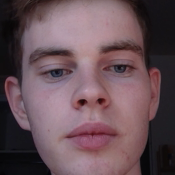

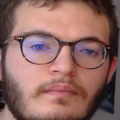

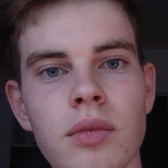

In [7]:
import IPython.display as display

for n in range(3):
  image_path = random.choice(all_image_paths)
  #print('image path: ',image_path)
  display.display(display.Image(image_path))

###Label images

In [8]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['Guillaume_Loranchet', 'Guillaume_Paya', 'Miha_S', 'Nicholas_S']

In [9]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'Guillaume_Loranchet': 0, 'Guillaume_Paya': 1, 'Miha_S': 2, 'Nicholas_S': 3}

In [10]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [0, 2, 3, 2, 1, 1, 3, 0, 3, 1]


###Load images with Tensor Flow

In [11]:
img_path = all_image_paths[0]
img_path

'/root/.keras/datasets/next_ite/Guillaume_Loranchet/Guillaume_Loranchet_24.png'

raw data

In [12]:
img_raw = tf.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xa...


In [13]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(167, 167, 3)
<dtype: 'uint8'>


In [14]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.011764706
0.72524


In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [0]:
def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

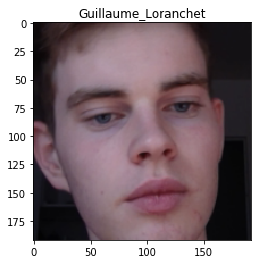

In [17]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
#plt.xlabel(caption_image(img_path).encode('utf-8'))
plt.title(label_names[label].title())
print()

##Build a tf.data.Dataset

In [0]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [19]:
print('shape: ', repr(path_ds.output_shapes))
print('type: ', path_ds.output_types)
print()
print(path_ds)

shape:  TensorShape([])
type:  <dtype: 'string'>

<DatasetV1Adapter shapes: (), types: tf.string>


In [0]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

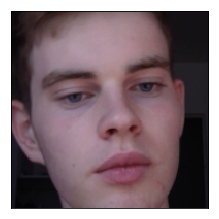

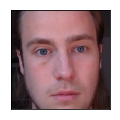

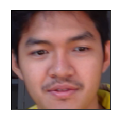

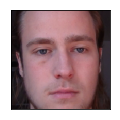

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  #plt.xlabel(caption_image(all_image_paths[n]))
  plt.show()

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [27]:
for label in label_ds.take(10):
  print(label_names[label.numpy()])

Guillaume_Loranchet
Miha_S
Nicholas_S
Miha_S
Guillaume_Paya
Guillaume_Paya
Nicholas_S
Guillaume_Loranchet
Nicholas_S
Guillaume_Paya


In [0]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [29]:
print(image_label_ds)

<DatasetV1Adapter shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>
